# Exercise 4 Details

Author: Terence Yu

Course and Section: AIDI-1002-01

Dataset Source: https://www.kaggle.com/mohamedharris/employee-satisfaction-index-dataset

# Business Problem Description

In any company, employee turnover is something that HR wants to reduce as much as possible. This is because it costs the company money to find, hire, and train a new employee. There is also a loss in productivity between a new employee and a tenured employee due to experience in doing the job. One of the main determining factors of whether an employee will leave the company is employment satisfaction. As such a method of determining employment satisfaction is a great tool to identify employees at risk of leaving and will give HR time to talk with the person and take steps to improve their perception of their jobs.

# Solution

## Load the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv('Employee Satisfaction Index.csv', index_col=0)

## Exploratory Data Analysis

### Data Analysis

In [3]:
dataset.shape

(500, 13)

Dataset contains 918 records with 12 columns

In [4]:
dataset.columns

Index(['emp_id', 'age', 'Dept', 'location', 'education', 'recruitment_type',
       'job_level', 'rating', 'onsite', 'awards', 'certifications', 'salary',
       'satisfied'],
      dtype='object')

Independent Variables


* emp_id - unique identifier for employee
* age - age of employee
* Dept - department that the employee is working for
* location - employee location
* education - employee education level
* recruitment_type - mode of recruitment
* job_level - job level of employee (from 1 to 5)
* rating - previous year job rating of employee (1 to 5)
* onsite - whether or not employee has ever been onsite at location
* awards - no. of awards
* certifications - is the employee certified
* salary - employee net salary

Dependent Variable
* satisfied - 1 if employee is satisfied; 0 otherwise



In [5]:
dataset.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [6]:
dataset.tail()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0
499,TECH7731,26,Technology,City,UG,Recruitment Agency,3,4,0,3,0,42419,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   emp_id            500 non-null    object
 1   age               500 non-null    int64 
 2   Dept              500 non-null    object
 3   location          500 non-null    object
 4   education         500 non-null    object
 5   recruitment_type  500 non-null    object
 6   job_level         500 non-null    int64 
 7   rating            500 non-null    int64 
 8   onsite            500 non-null    int64 
 9   awards            500 non-null    int64 
 10  certifications    500 non-null    int64 
 11  salary            500 non-null    int64 
 12  satisfied         500 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 54.7+ KB


Above cells shows sample data of the dataset for initial analysis. Result shows that there are non-numerical columns (Categorical) such as emp_id, Dept, location, education, and recruitment_type. Also, that all columns are populate with no null values.

In [8]:
dataset.isnull().sum()

emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

Verified that there are no null column values.

In [9]:
dataset.describe()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


Above shows statistical information about numerical columns in the dataset

Statistical information also shows that the range of values between different numerical fields vary greatly which implies that the dataset needs to be scaled.

### Plot Analysis

#### Output Class: Satisfied

In [10]:
dataset['satisfied'].value_counts()

1    263
0    237
Name: satisfied, dtype: int64

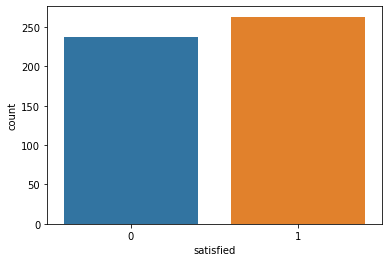

In [11]:
sns.countplot(x = 'satisfied', data = dataset)
plt.show()

Above plot shows that the dataset is relatively balanced with almost similar counts of participants found with heart disease and those who do not. This makes accuracy reporting better as there are no bias in any particular output class.

#### Numerical Features

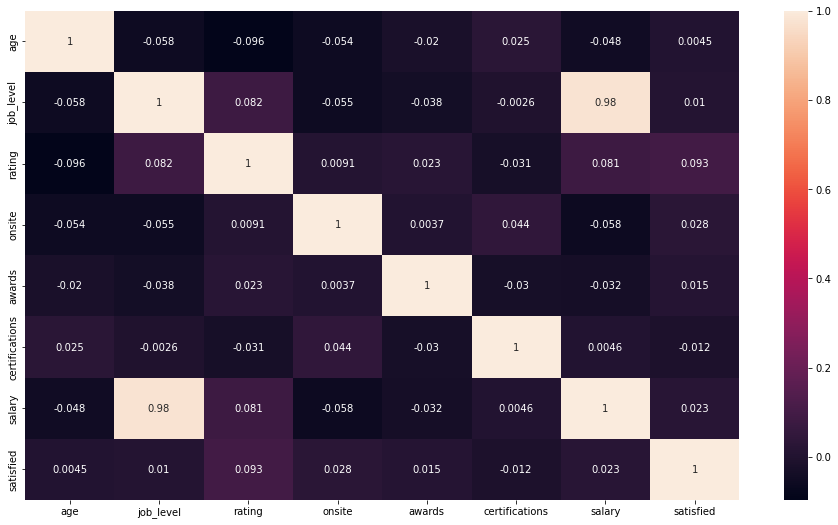

In [12]:
plt.figure(figsize=(16,9))
plt_df = dataset.drop(['emp_id', 'Dept', 'location', 'education', 'recruitment_type'],axis = 1)
ax = sns.heatmap(plt_df.corr(),annot = True)
plt.show()

As seen in the heatmap above, only one pair of correlated features can be found. The salary is significantly correlated with the job_level which is expected in any company as a higher position should come with higher pay.

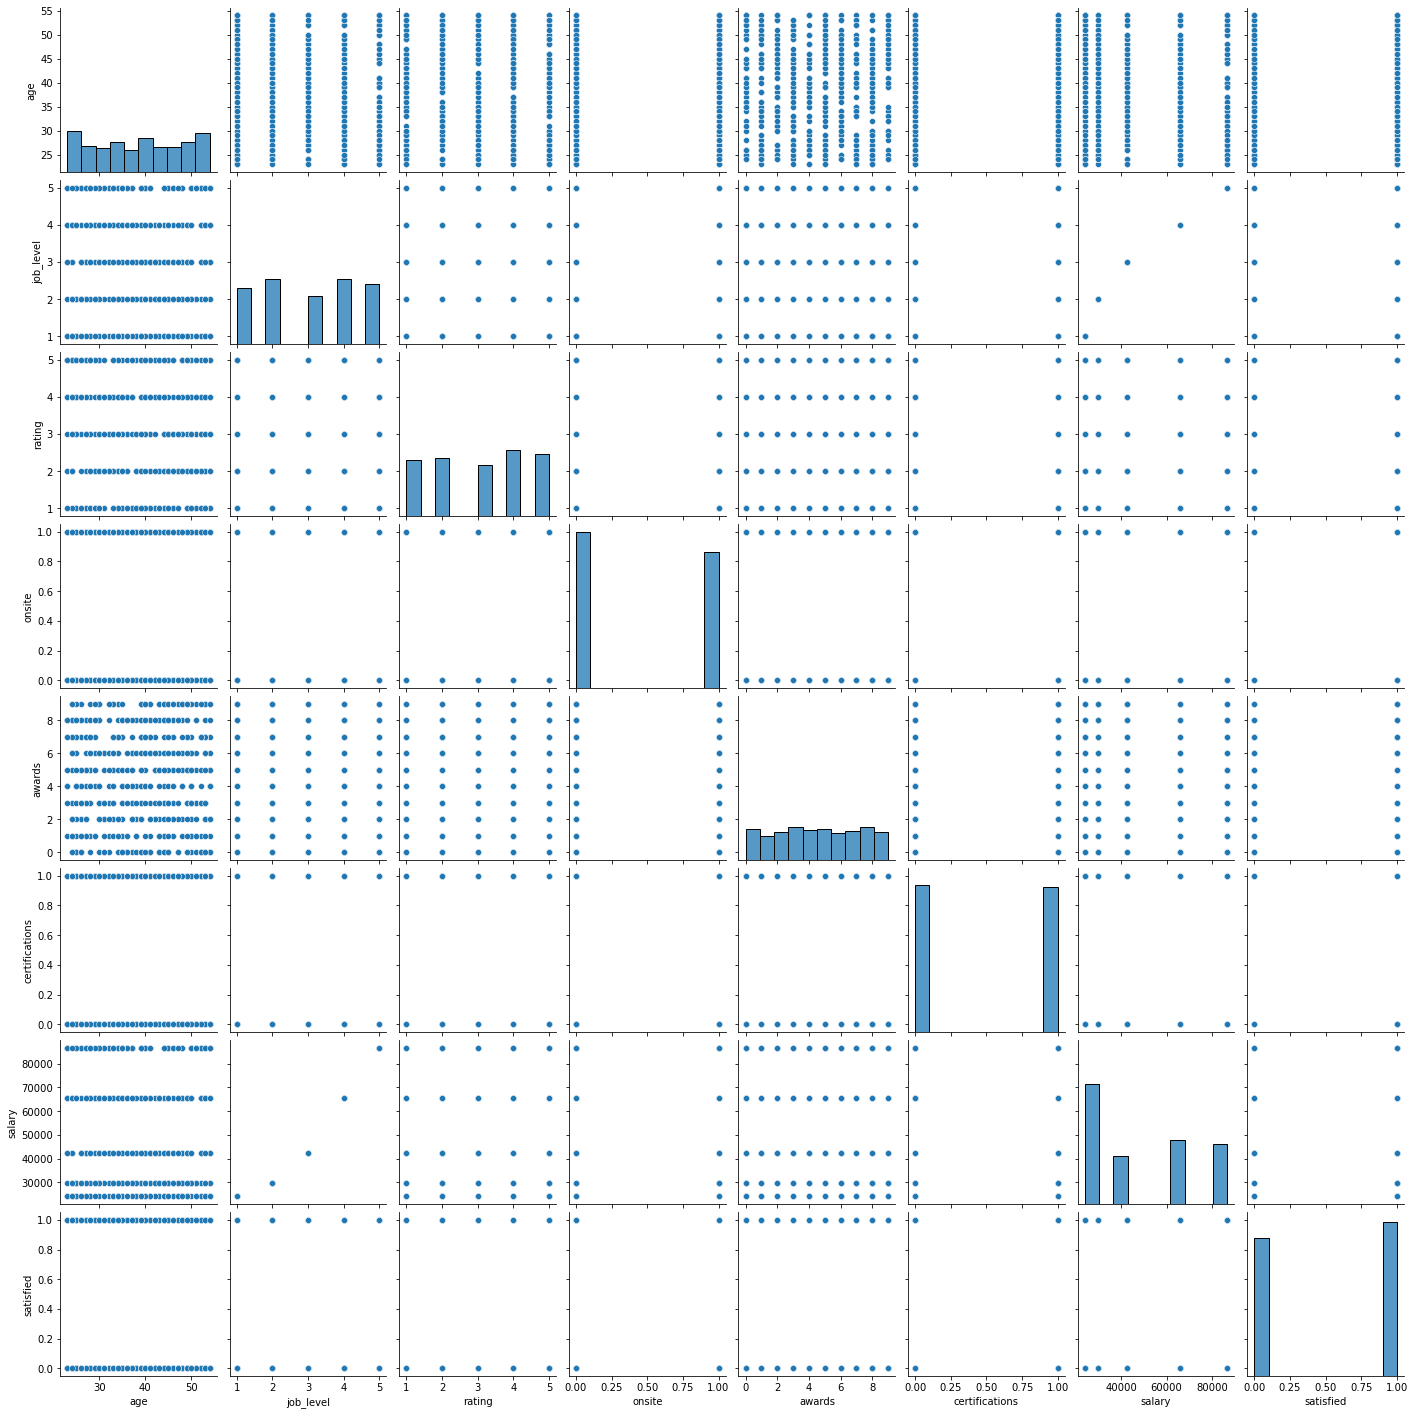

In [13]:
sns.pairplot(plt_df)

The pairplot shows that distribution among values are even except for the previously identified correlated features which are salary and job level. The high degree of correlation between these two fields is obvious from the nearly straight line plot.

#### Categorical Fields

##### Dept

In [14]:
dataset['Dept'].value_counts()

Purchasing    109
HR            106
Technology     98
Marketing      95
Sales          92
Name: Dept, dtype: int64

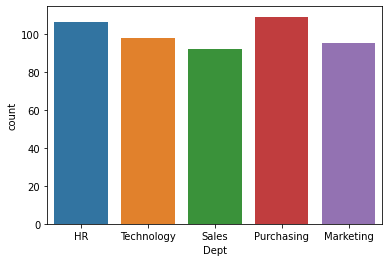

In [15]:
sns.countplot(x = 'Dept',data = dataset)
plt.show()

The departments that are part of the population are:
* HR
* Technology
* Sales Dept
* Purchasing
* Marketing

Plot shows that all departments are represented with similar population.

##### location

In [16]:
dataset['location'].value_counts()

City      259
Suburb    241
Name: location, dtype: int64

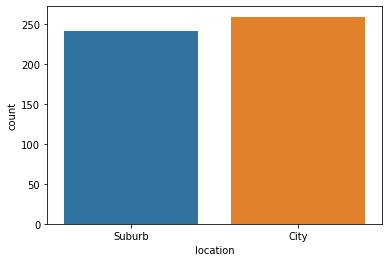

In [17]:
sns.countplot(x = 'location',data = dataset)
plt.show()

Possible values for location are:
* Suburb
* City

Both types are represented with almost similar counts

##### education

In [18]:
dataset['education'].value_counts()

PG    254
UG    246
Name: education, dtype: int64

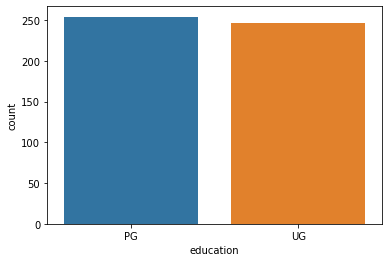

In [19]:
sns.countplot(x = 'education',data = dataset)
plt.show()

Possible values for education are:
* PG - post graduate
* UG - under graduate

Both types are represented with almost similar counts

##### recruitment_type

In [20]:
dataset['recruitment_type'].value_counts()

On-Campus             133
Referral              131
Walk-in               128
Recruitment Agency    108
Name: recruitment_type, dtype: int64

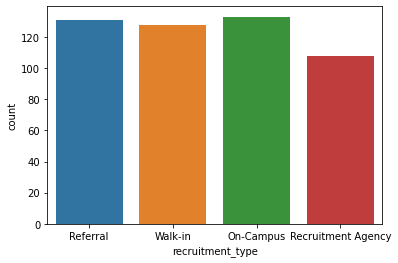

In [21]:
sns.countplot(x = 'recruitment_type',data = dataset)
plt.show()

Possible values for recruitment_type are:
* Referral
* Walk-in
* On-Campus
* Recruitment Agency

Referral, walk-in, and on-campus population have similar counts with recruitment agency having slightly less population compared to the other three.

## Feature Engineering

Since machine learning models process numerical values instead of text data, categorical data must first be converted
to numerical data. One hot encoding is used to convert to numerical data to
avoid potential misinterpretation of the algorithm that the numerical values
are ordinal and can be compared against each other.

### Feature Selection

Since employee ID is a unique identifier, it is not useable in a machine learning perspective. Therefore it will be dropped before training.

As seen in the EDA section, the job_level and salary fields are very correlated. As such, we can drop one field in favor of the other. Since salary has greater range, we drop job_level instead.

In [22]:
dataset = dataset.drop(['emp_id', 'job_level'], axis=1)

### One-Hot Encoding

In [23]:
dataset_encoded = pd.get_dummies(data=dataset,
                                 columns=[
                                          'Dept', 
                                          'location', 
                                          'education', 
                                          'recruitment_type'
                                          ],
                                 drop_first=True)

Above adds one-hot encoded columns based on the categorical fields and drops the original categorical fields

In [24]:
dataset_encoded.head()

,age,rating,onsite,awards,certifications,salary,satisfied,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_Suburb,education_UG,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,28,2,0,1,0,86750,1,0,0,0,0,1,0,0,1,0
1,50,5,1,2,1,42419,0,0,0,0,1,1,0,0,0,1
2,43,1,0,2,0,65715,0,0,0,0,1,1,1,0,1,0
3,44,3,1,0,0,29805,1,0,0,1,0,0,0,0,0,0
4,33,1,0,5,0,29805,1,0,0,0,0,0,1,1,0,0


In [25]:
dataset_encoded.tail()

,age,rating,onsite,awards,certifications,salary,satisfied,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_Suburb,education_UG,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
495,49,5,0,6,0,29805,1,0,0,0,0,1,0,0,0,0
496,24,4,0,2,0,29805,0,0,0,0,1,1,1,0,1,0
497,34,3,0,2,0,24076,1,1,0,0,0,0,0,0,0,0
498,26,1,1,1,1,29805,0,0,0,0,1,0,1,0,0,0
499,26,4,0,3,0,42419,0,0,0,0,1,0,1,1,0,0


In [26]:
dataset_encoded.columns

Index(['age', 'rating', 'onsite', 'awards', 'certifications', 'salary',
       'satisfied', 'Dept_Marketing', 'Dept_Purchasing', 'Dept_Sales',
       'Dept_Technology', 'location_Suburb', 'education_UG',
       'recruitment_type_Recruitment Agency', 'recruitment_type_Referral',
       'recruitment_type_Walk-in'],
      dtype='object')

The new one-hot encoded features are now added into the dataset for processing

In [27]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  500 non-null    int64
 1   rating                               500 non-null    int64
 2   onsite                               500 non-null    int64
 3   awards                               500 non-null    int64
 4   certifications                       500 non-null    int64
 5   salary                               500 non-null    int64
 6   satisfied                            500 non-null    int64
 7   Dept_Marketing                       500 non-null    uint8
 8   Dept_Purchasing                      500 non-null    uint8
 9   Dept_Sales                           500 non-null    uint8
 10  Dept_Technology                      500 non-null    uint8
 11  location_Suburb                      500 non-null    uint8

Verified that there are no more categorical oolumns in the dataset

### Scaling

In [28]:
scaler = StandardScaler()
scaler.fit(dataset_encoded.drop('satisfied',axis = 1))

StandardScaler()

Prepare scaler for scaling datasets later

## ML Classifiers and Datasets without Cross Validation

### Segregate Train and Test Data

In [29]:
X = dataset_encoded.drop('satisfied',axis = 1)
y = dataset_encoded['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scale All Data

In [30]:
X = scaler.transform(X)

### Scale Train Data

In [31]:
X_train = scaler.transform(X_train)

### Scale Test Data

In [32]:
X_test = scaler.transform(X_test)

### Train Model

In [33]:
model = SVC()
model.fit(X_train, y_train)

SVC()

### Predictions

In [34]:
predictions = model.predict(X_test)

### Metrics

#### Classification Report

In [35]:
base_classification_report = classification_report(y_test,predictions)
print(base_classification_report)

              precision    recall  f1-score   support

           0       0.42      0.29      0.34        73
           1       0.48      0.62      0.54        77

    accuracy                           0.46       150
   macro avg       0.45      0.46      0.44       150
weighted avg       0.45      0.46      0.44       150



#### Confusion Matrix

In [36]:
base_confusion_matrix = confusion_matrix(y_test,predictions)
print(base_confusion_matrix)

[[21 52]
 [29 48]]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


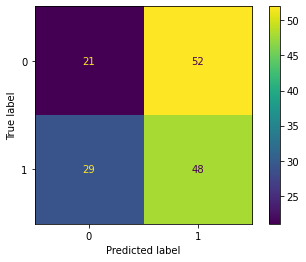

In [37]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

#### Accuracy

In [38]:
base_accuracy = accuracy_score(y_test, predictions)
print('Accuracy score:', base_accuracy)

Accuracy score: 0.46


#### Precision

In [39]:
base_precision = precision_score(y_test, predictions)
print('Precision score:', base_precision)

Precision score: 0.48


#### F1 Score

In [40]:
base_f1 = f1_score(y_test, predictions)
print('F1 score:', base_f1)

F1 score: 0.5423728813559322


## Cross Validation

### Hyper-Parameter Tuning

Cross validation performs multiple runs of splitting the dataset using different sets of training and testing sets and then getting the average accuracy for those runs.

Before running a cross-validation run against the whole dataset, we search for the best parameters of Support Vector Machines that provides the best accuracy results.

We will perform standard K-fold with 5 splits. This just splits the dataset into 5 buckets and runs the algorithm 5 times. For each run, one of the bucket is chosen as the test dataset with the other 4 as the training dataset.

In [41]:
kf = KFold(n_splits=5, shuffle=True)

Define below the different sets of parameter values for running the hyper-parameter tuning.

In [42]:
parameters = [
              {
                  'C': [0.1, 1, 10],
                  'gamma': [1, 0.1, 0.01],
                  'kernel': ['linear', 'rbf', 'sigmoid'],
               },
              {
                  'C': [0.1, 1, 10],
                  'gamma': [1, 0.1, 0.01],
                  'kernel': ['poly'],
                  'degree': [2, 3, 4]
              }
]

Run hyperparameter tuning with cross-validation using 5 k-fold

In [43]:
grid = GridSearchCV(SVC(), parameters, cv=kf, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.486 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.543 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.471 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.457 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.457 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.471 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.557 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.543 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.557 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': [1, 0.1, 0.01], 'kernel': ['poly']}],
             verbose=4)

Show best accuracy result found from hyper parameter tuning runs

In [44]:
grid.best_score_

0.5971428571428572

Show the parameters that resulted to the best accuracy found

In [45]:
grid.best_params_

{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}

### Accuracy Result

Prepare Support Vector Machine with the "best" parameters found.

In [46]:
cv_svc = SVC(C=1, gamma=0.1, kernel='poly', degree=2)

Run cross validation across whole dataset to determine average accuracy

In [47]:
cross_val_result = cross_val_score(cv_svc , X, y, cv = kf)

Show average accuracy found

In [48]:
cross_val_result.mean()

0.562

# Summary and Insights

Support Vector Machines (SVM) can be used to perform classification functions.

SVM supports different kernels for determining gaps between classes.

Cross validation provides more confidence in the resulting metrics of an algorithm by running the algorithm multiple times using different training and testing sets, the results of which are saved and aggregated.

SVM is NOT a good classification algorithm to use on this dataset, providing only approximately 55% accuracy. This may be because the data is synthetic or due to relatively small dataset.